In [246]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
import random

In [329]:
np.random.seed(12)

#Let's generate dataset

ranges = np.arange(1, 100, 0.5)

x1 = np.random.randn(100) * 10
x2 = np.random.randn(100) * 3

noise = np.random.randn(100)

y = x1 * -0.2 + x2 * 2.3  + noise #Real equation we will need to estimate

X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], axis=1)


In [331]:
n_weights = 2

def generate_random_population(n_indivs, n_weights):

  return list(np.random.randn(n_indivs, n_weights) * 5) #list of arrays

def crossover(parent1, parent2):
  #exchange parents weights

  decision = random.random()


  if decision >= 0.5:
    child = [parent1[0], parent2[1]]

  else:
    child = [parent2[0], parent1[1]]

  return child


def fitness_score(individual):
  #let's just compute r^2 score

  y_preds = X @ individual

  score = r2_score(y, y_preds)

  return (score)

def mutate(individual, mutation_rate=0.1):

  if random.random() <= mutation_rate:
    gen_to_mut = random.randint(0, 1)

    new_indiv = individual.copy()


    new_indiv[gen_to_mut] += random.random()
    new_indiv[gen_to_mut] = float(new_indiv[gen_to_mut])


    return new_indiv #mutated individual

  return individual #unchanged individual

def select_parent(indivs, random_choice_rate=0.2, elitarism_rate=0.3):

  indiv_fit_scores = np.array([fitness_score(indiv) for indiv in indivs])

  if random.random() < random_choice_rate:
    #pick a random individual
    id = random.randint(0, len(indivs) - 1)
    parent = indivs.pop(id)

  else:
    #chose one with max fitness score
    id = np.argmax(indiv_fit_scores)
    parent = indivs.pop(id)

  #ELITARISM
  if (random.random() < elitarism_rate):
    indivs.append(parent)

  return parent









## Running Genetic Algorithm to find a good pair w1, w2

In [341]:
mutation_rate = 0.1
random_choice_rate = 0.025

n_indivs = 20
#generations = 20
n_pairs = n_indivs // 2

elitarism_rate = 0.1

n_generations = 150

In [343]:

population = generate_random_population(n_indivs, 2)

history = []

for generation_num in range(n_generations):

  new_generation = []

  for _ in range(n_pairs):

      #select 2 parents
      parent1 = select_parent(population, random_choice_rate, elitarism_rate)
      parent2 = select_parent(population, random_choice_rate, elitarism_rate)



      #produce n children:
      n_children = 2

      for _ in range(n_children):

        #produce a child
        child = crossover(parent1, parent2)
        #add potential mutation
        child = mutate(child, mutation_rate=mutation_rate)

        #append child to new_generation
        new_generation.append(child)


  #Let's find best pair on this generation

  print("--------------------------")
  best_pair_score = max([fitness_score(indiv) for indiv in new_generation])
  print("Best R^2 score in Generation: ", best_pair_score)

  history.append(best_pair_score)
  population = new_generation



--------------------------
Best R^2 score in Generation:  0.7593776965414568
--------------------------
Best R^2 score in Generation:  0.7593776965414568
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8695997800901631
--------------------------
Best R^2 score in Generation:  0.8701948728785158
--------------------------
Best R^2 score in Generation:  0.8701948728785158
--------------------------
Best R^2 score in Generation:  0.9275537693405514

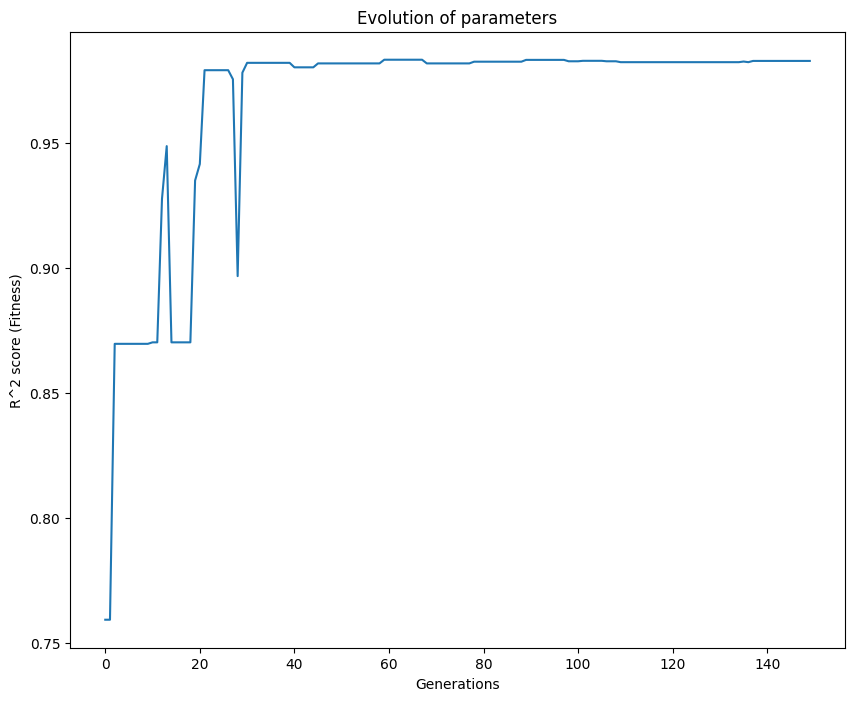

In [344]:

#plotting the evolution progress

plt.figure(figsize=(10, 8))
plt.title("Evolution of parameters")

plt.xlabel("Generations")
plt.ylabel("R^2 score (Fitness)")

plt.plot(np.arange(0, len(history)), history)